# Problem 1 (using Dataset3 From HW1)

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Perceptron
from sklearn.model_selection import LearningCurveDisplay
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from utils import plotDecBoundaries
from utils import Polynomial_Mapping, accuracy
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable 
from scipy.special import comb





In [6]:
train_set = "dataset3_train.csv"
test_set = "dataset3_test.csv"

train_data = pd.read_csv(train_set, header=None, skiprows=1)
X_train_original = train_data.iloc[:, :-1].values.astype(float)
y_train_original = train_data.iloc[:, -1].values.astype(int)


test_data = pd.read_csv(test_set, header=None, skiprows=1)
X_test_original = test_data.iloc[:, :-1].values.astype(float)
y_test_original = test_data.iloc[:, -1].values.astype(int)

scaler = StandardScaler()
scaler.fit(X_train_original)
X_train = scaler.transform(X_train_original)
X_test = scaler.transform(X_test_original)

print(X_train.shape)
print(X_test.shape)

#print(X_train)

(100, 2)
(100, 2)


Order 1 Accuracy Train : 71.00%
Order 1 Accuracy Test : 67.00%


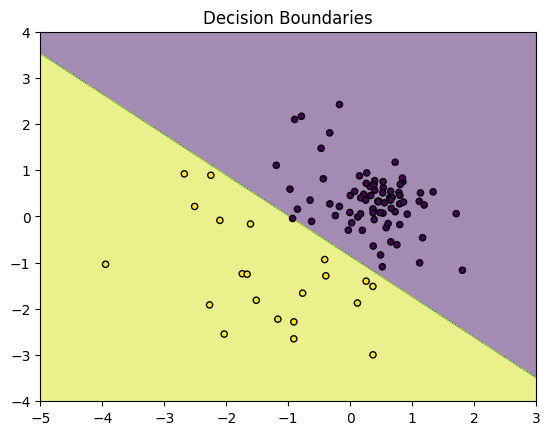

Order 2 Accuracy Train : 87.00%
Order 2 Accuracy Test : 88.00%


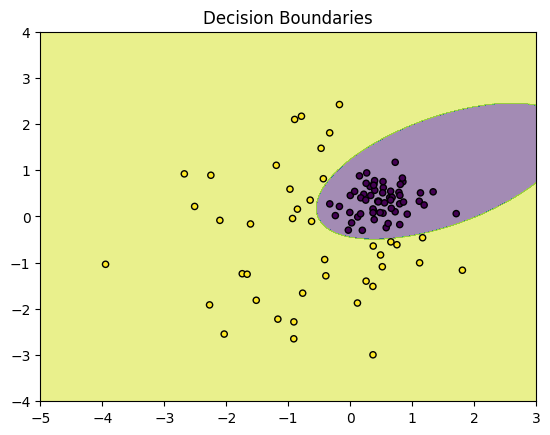

Order 3 Accuracy Train : 88.00%
Order 3 Accuracy Test : 87.00%


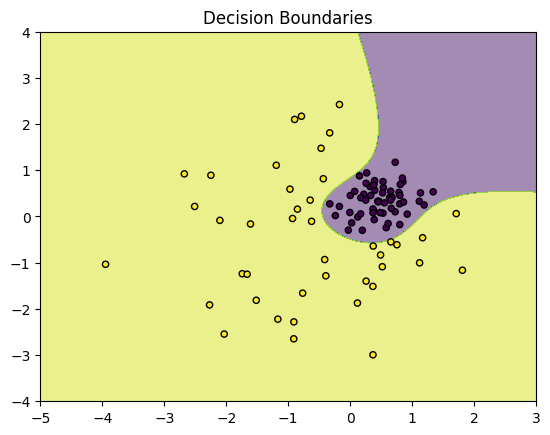

Order 4 Accuracy Train : 85.00%
Order 4 Accuracy Test : 86.00%


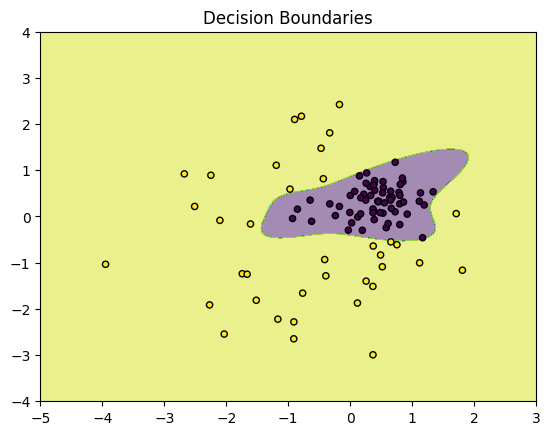

Order 5 Accuracy Train : 85.00%
Order 5 Accuracy Test : 89.00%


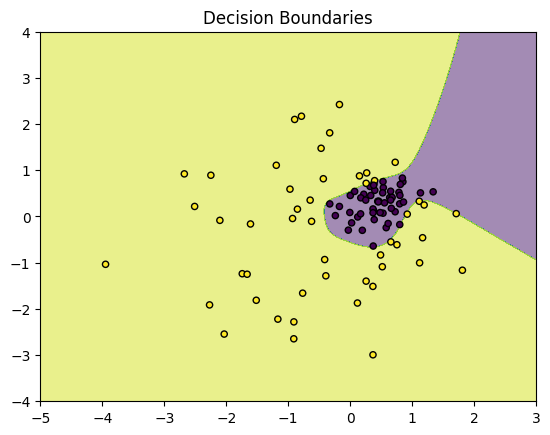

Order 6 Accuracy Train : 83.00%
Order 6 Accuracy Test : 86.00%


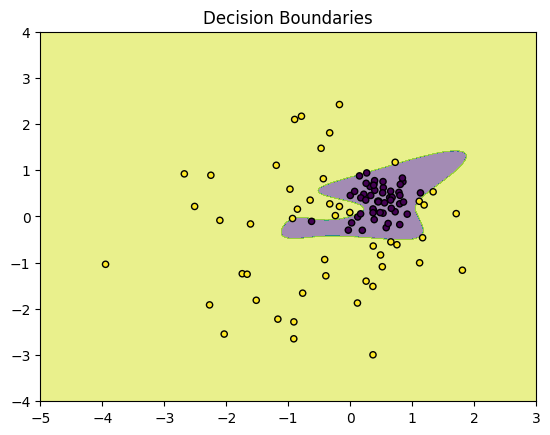

Order 7 Accuracy Train : 85.00%
Order 7 Accuracy Test : 79.00%


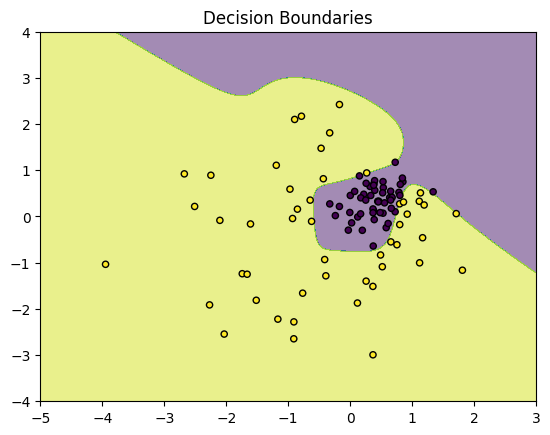

Order 10 Accuracy Train : 82.00%
Order 10 Accuracy Test : 90.00%


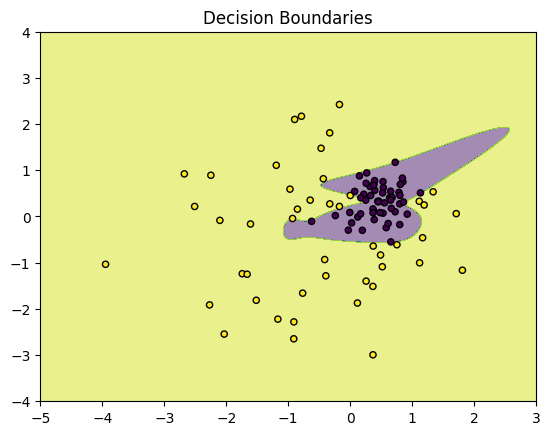

Order 11 Accuracy Train : 73.00%
Order 11 Accuracy Test : 69.00%


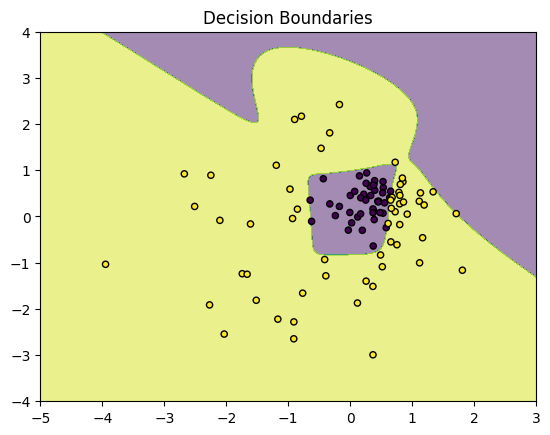

C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Order 15 Accuracy Train : 73.00%
Order 15 Accuracy Test : 74.00%


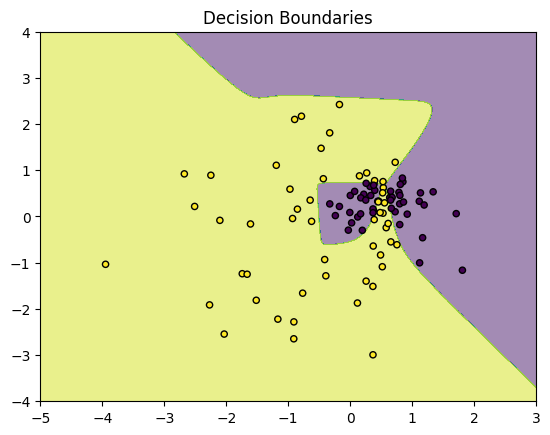

+-------------------+---------------------------+----------------------------+
| Polynomial degree | Degrees-of-freedom(d.o.f) | Number of constraints (Nc) |
+-------------------+---------------------------+----------------------------+
|         1         |             3             |            100             |
|         2         |             6             |            100             |
|         3         |             10            |            100             |
|         4         |             15            |            100             |
|         5         |             21            |            100             |
|         6         |             28            |            100             |
|         7         |             36            |            100             |
|         8         |            45.0           |            100             |
|         9         |            55.0           |            100             |
|         10        |             66            |   

In [9]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Polynomial degree", "Degrees-of-freedom(d.o.f)", "Number of constraints (Nc)"]) 
orders = [1, 2, 3, 4, 5, 6, 7, 10, 11, 15]
# Generate polynomial features for all specified orders and store them
polynomial_features = {order: np.array(Polynomial_Mapping(X_train, order)) for order in orders} #dictionary {key, value} = {order number, polynormial features}
#print(polynomial_features)

for order in orders:
    # Convert polynomial_features[order] to a NumPy array with a numeric type, if necessary
    
    poly_features = np.array(polynomial_features[order], dtype=float)  #converting the value of a particular order to array 
    dof = poly_features.shape[1]
    Nc = poly_features.shape[0]
    myTable.add_row([order, dof, Nc])
    
    
    # Check for NaN values in the numeric array
    if np.isnan(poly_features).any():
        print(f"NaN values found for order {order}")
        continue   # Skip this iteration if NaN values are found
        
    perceptron = Perceptron(max_iter=10000, tol=1e-3, random_state=0)
    perceptron.fit(np.array(polynomial_features[order]), y_train_original)  # Fit the model with polynomial features of the current order
    
    y_train_pred = perceptron.predict(polynomial_features[order]) #predict using polynomial features generated earlier in dict(polynomial features)
    #accuracy = accuracy_score(y_train_original, y_train_pred)
    accuracy_score = accuracy(y_train_pred, y_train_original)
    print(f"Order {order} Accuracy Train : {accuracy_score:.2f}%") 

    X_poly_test = Polynomial_Mapping(X_test, order) #Generate polynomial features for the test set
    y_test_pred = perceptron.predict(X_poly_test)  # Predict and calculate accuracy
    accuracy_score = accuracy(y_test_pred, y_test_original)
    #accuracy = accuracy_score(y_test_original, y_test_pred)
    print(f"Order {order} Accuracy Test : {accuracy_score:.2f}%") 
    plotDecBoundaries(X_train, y_train_pred, perceptron, order)


new_orders = [8, 9, 12, 13, 14, 16, 17, 18, 19, 20]
n = 2  
doff = 0
for order in new_orders:
    doff = comb(n+order, order)
    #print(dof)
    #dof = poly_features2.shape[1]
    Nc = 100
    myTable.add_row([order, doff, Nc])
myTable.sortby = "Polynomial degree"
print(myTable)
    

1. b), c):

1. (b) For order 1, train and test accuracies are 71%, 67% respectively. Suggesting that we need to increase the order so that we can reduce the misclassifications. For order 1, we get a linear decision boundary. For order 2, the accuarcy of train and test is 87% and 88% respectively, i.e. it is higher than order 1, => performance improvement because of non-linear boundary.
2. For order,4,5,6 the accuracies of test data are better than the train data suggesting our model is performing well without overfitting.
3. For order 7, the train accuracy is 85% and test data accuracy is 79%. 6% drop from training to test accuracy isn't necessarily alarming, but it suggests that there could have been overfitting.  Compare the train and test accuracy, and decision regions, for each polynomial order.
4. Order 10 Accuracy Train : 82.00%
Order 10 Accuracy Test : 90.00
Thsi suggests that the test set contains patterns that are better captured by the model than those in the training set, improving accuarcy by 8%.%
Order 11 Accuracy Train : 73.00%
Order 11 Accuracy Test : 69.
This can suggest underfitting, it can can occur if the features used are not informative enough, if the model hasn't been trained sufficiently, or if there's too much regularization.
Order 15 Accuracy Train : 73.00%
Order 15 Accuracy Test : 74.00%Even though the accuracy is not that bad, but clearly our model was performing much better at order 4,5,6, etc. Since it didn't converge, we  might need to apply regularization techniques to prevent the model from fitting noise in the training data.tions.

In [ ]:
Ques 3 b):

In [8]:
X = np.array([
    [1, -2, -1],
    [1, 0, 3],
    [1, 2, 1],
    [1, 3, -2],
    [1, 3, -4],
    [1, 6, -1]])
y = [1, 1, 1, -1, -1, -1]
X_0 = np.dot(X.T, X)
X_inv = np.linalg.pinv(X_0)
X_del = np.dot(X_inv, X.T)
w_hat = np.dot(X_del, y)
print(w_hat) #features: 1,x1,x2 => w0,w1,w2 (3 weight values)
w_sq  = np.square(w_hat)
print(np.sqrt(np.sum(w_sq)))




[ 0.64010989 -0.23901099  0.24313187]
0.7252448066589641


PDF is Saved Successfully


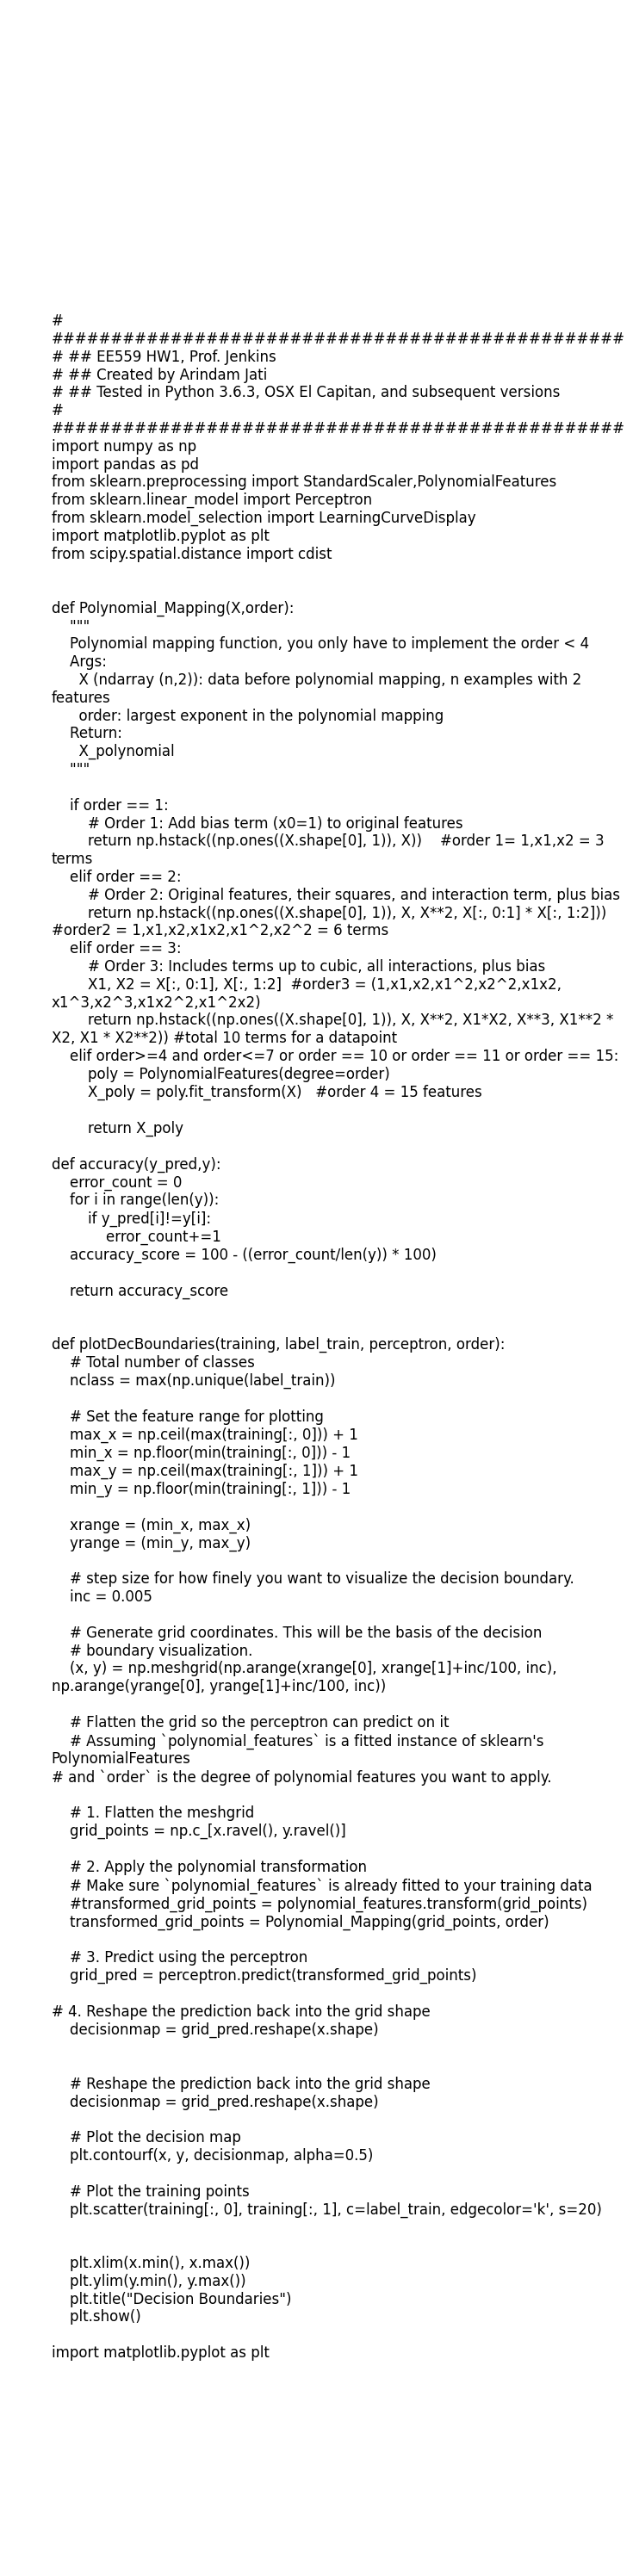